In [29]:
import pandas as pd
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.ct.gov", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.ct.gov,
#                  MyAppToken,
#                  userame="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
df = client.get("28fr-iqnx", limit=10000)

# Convert to pandas DataFrame
df = pd.DataFrame.from_records(df)

In [30]:
df

,lastupdatedate,town_no,town,towntotalcases,townconfirmedcases,townprobablecases,towncaserate,towntotaldeaths,townconfirmeddeaths,townprobabledeaths,peopletested,ratetested100k,numberoftests,numberofpositives,numberofnegatives,numberofindeterminates
0,2020-08-06T00:00:00.000,1,Andover,9,9,0,279,0,0,0,370,11452,500,9,491,0
1,2020-08-06T00:00:00.000,2,Ansonia,298,291,7,1592,8,7,1,2680,14315,4102,360,3733,9
2,2020-08-06T00:00:00.000,3,Ashford,23,22,1,540,0,0,0,489,11476,688,27,661,0
3,2020-08-06T00:00:00.000,4,Avon,149,139,10,814,31,23,8,2336,12764,3085,158,2923,4
4,2020-08-06T00:00:00.000,5,Barkhamsted,31,30,1,855,0,0,0,457,12610,621,31,588,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2020-05-29T00:00:00.000,25,Cheshire,182,NaN,NaN,624,22,NaN,NaN,1223,4191,NaN,NaN,NaN,NaN
9996,2020-05-29T00:00:00.000,26,Chester,46,NaN,NaN,1088,13,NaN,NaN,156,3689,NaN,NaN,NaN,NaN
9997,2020-05-29T00:00:00.000,27,Clinton,52,NaN,NaN,402,2,NaN,NaN,530,4093,NaN,NaN,NaN,NaN
9998,2020-05-29T00:00:00.000,28,Colchester,36,NaN,NaN,226,1,NaN,NaN,663,4160,NaN,NaN,NaN,NaN


In [52]:
df['moving'] = df.groupby('town')['townconfirmedcases'].transform(lambda x: x.rolling(7, 1).mean())

In [53]:
df.sort_values(by=['lastupdatedate'], ascending=True)

,lastupdatedate,town_no,town,towntotalcases,townconfirmedcases,townprobablecases,towncaserate,towntotaldeaths,townconfirmeddeaths,townprobabledeaths,peopletested,ratetested100k,numberoftests,numberofpositives,numberofnegatives,numberofindeterminates,moving
9999,2020-05-29T00:00:00.000,29,Colebrook,2,NaN,NaN,142,0,NaN,NaN,34,2420,NaN,NaN,NaN,NaN,3.0
9971,2020-05-29T00:00:00.000,1,Andover,10,NaN,NaN,310,0,NaN,NaN,82,2538,NaN,NaN,NaN,NaN,9.0
9972,2020-05-29T00:00:00.000,2,Ansonia,256,NaN,NaN,1367,5,NaN,NaN,1121,5988,NaN,NaN,NaN,NaN,254.8
9973,2020-05-29T00:00:00.000,3,Ashford,15,NaN,NaN,352,0,NaN,NaN,134,3145,NaN,NaN,NaN,NaN,15.0
9974,2020-05-29T00:00:00.000,4,Avon,117,NaN,NaN,639,22,NaN,NaN,594,3246,NaN,NaN,NaN,NaN,107.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,2020-08-06T00:00:00.000,110,Plainville,180,178,2,1021,26,25,1,2311,13114,3923,215,3700,8,178.0
108,2020-08-06T00:00:00.000,109,Plainfield,50,49,1,330,1,1,0,1947,12832,2811,55,2754,2,49.0
107,2020-08-06T00:00:00.000,108,Oxford,88,84,4,665,6,6,0,1671,12634,2323,115,2207,1,84.0
115,2020-08-06T00:00:00.000,116,Putnam,35,34,1,373,1,1,0,1034,11006,1370,37,1332,1,34.0


In [54]:
import matplotlib.pyplot as plt

In [57]:
df[df['town']=='New Haven'].groupby('lastupdatedate')

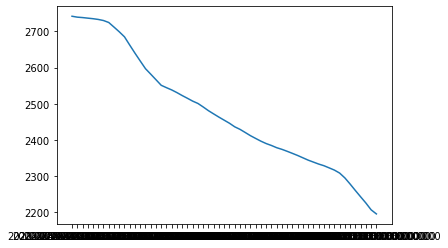

In [56]:
plt.plot(df[df['town']=='Hartford']['lastupdatedate'],df[df['town']=='Hartford']['moving'])


TypeError: nan is not a string

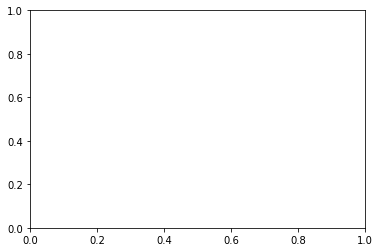

In [34]:
plt.plot(df[df['town']=='New Haven']['townconfirmedcases'])